<a href="https://colab.research.google.com/github/andrewrandall25/product-category-classification-ml/blob/main/notebook/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ucitavamo i proveravamo dataset

Prvo sto radimo proveravamo strukturu dataseta, kako bi znali od cega se sastoji i na sta treba paznju obratiti.
Ucitacemo csv fajl sa githuba, prikazati prvih par redova, proveriti koliko redova i kolona ima i baciti pogled na to koji su tipovi kolona.

In [1]:
import pandas as pd

# Ucitavamo skup sa githuba
url = "https://raw.githubusercontent.com/andrewrandall25/product-category-classification-ml/main/data/products.csv"

df = pd.read_csv(url)

# Prikazujemo broj kolona i redova

print("Dataset shape (rows, columns):", df.shape)

# Prikazujemo prvih 5 redova
print("\nFirst 5 rows:")
display(df.head())

# Prikazujemo koje tipove podataka kolone imaju
print("\nDataset info:")
df.info()

Dataset shape (rows, columns): (35311, 8)

First 5 rows:


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


## Popravljamo imena kolona i datatypes

Uklanjamo prazan prostor sa imena kolona, stavljamo 'Listing Date' u datetime, i radimo konverziju numerickih kolona.

In [2]:
# Uklanjamo razmak sa pocetka i kraja naziva kolona
df.columns = df.columns.str.strip()

# Menjamo ime kolone
df.rename(columns={"_Product Code": "Product Code"}, inplace=True)

# Prebacujemo kolonu 'Listing Date' u datetime
df["Listing Date"] = pd.to_datetime(df["Listing Date"], format="%m/%d/%Y", errors="coerce")

# Radimo konverziju numerickih kolona
df["Number_of_Views"] = pd.to_numeric(df["Number_of_Views"], errors="coerce")
df["Merchant Rating"] = pd.to_numeric(df["Merchant Rating"], errors="coerce")

# Kolone sa id stavljamo u int
df["product ID"] = df["product ID"].astype("Int64")
df["Merchant ID"] = df["Merchant ID"].astype("Int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   product ID       35311 non-null  Int64         
 1   Product Title    35139 non-null  object        
 2   Merchant ID      35311 non-null  Int64         
 3   Category Label   35267 non-null  object        
 4   Product Code     35216 non-null  object        
 5   Number_of_Views  35297 non-null  float64       
 6   Merchant Rating  35141 non-null  float64       
 7   Listing Date     35252 non-null  datetime64[ns]
dtypes: Int64(2), datetime64[ns](1), float64(2), object(3)
memory usage: 2.2+ MB


# Provera nedostajajucih vrednosti

Proveravamo nedostajuce vrednosti kako ne bi imali problema tokom treniranja modela i odmah se uveravamo o kojem se broju radi i gde ima kolko nan, takodje cemo jedan seaborn grafikon napraviti da stvari budu jasnije

In [3]:
# Racunanje nan po koloni
print("Missing values per column: ")
print(df.isna().sum())

Missing values per column: 
product ID           0
Product Title      172
Merchant ID          0
Category Label      44
Product Code        95
Number_of_Views     14
Merchant Rating    170
Listing Date        59
dtype: int64


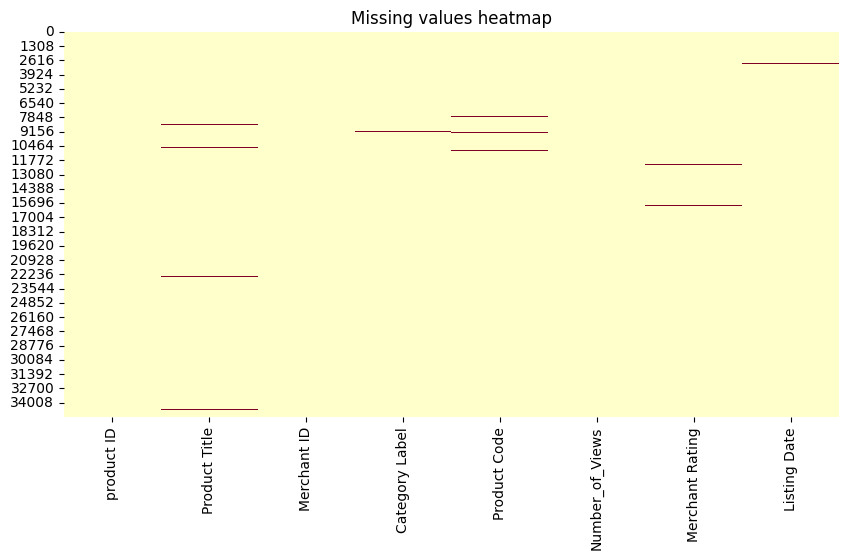

In [4]:
# Vizualizujemo nedostajajuce vrednosti preko seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap='YlOrRd')
plt.title("Missing values heatmap")
plt.show()

# Osnovna EDA analiza

Proveravamo broj kategorija, distribuciju kategorija i opis numerickih kategorija.

Number of different categories: 13


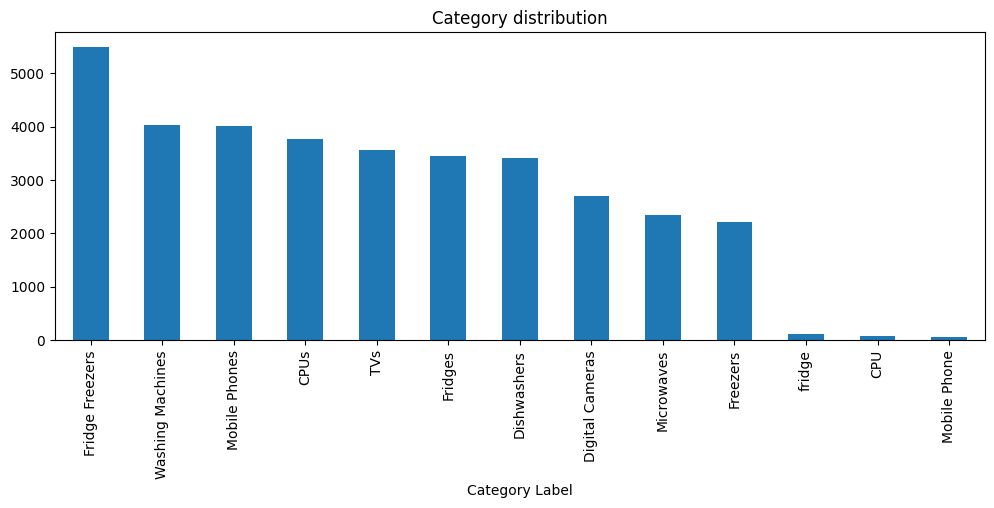

,product ID,Product Title,Merchant ID,Category Label,Product Code,Number_of_Views,Merchant Rating,Listing Date
count,35311.0,35139,35311.0,35267,35216,35297.000000,35141.000000,35252
unique,<NA>,30860,<NA>,13,35216,NaN,NaN,NaN
top,<NA>,washing machine,<NA>,Fridge Freezers,VY-2021-GI,NaN,NaN,NaN
freq,<NA>,90,<NA>,5495,1,NaN,NaN,NaN
mean,26150.800176,NaN,120.501883,NaN,NaN,2501.469587,2.998261,2023-07-06 20:34:44.103029504
min,1.0,NaN,1.0,NaN,NaN,0.000000,1.000000,2022-01-01 00:00:00
25%,14958.5,NaN,17.0,NaN,NaN,1256.000000,2.000000,2022-10-05 00:00:00
50%,27614.0,NaN,75.0,NaN,NaN,2509.000000,3.000000,2023-07-09 00:00:00
75%,37508.5,NaN,253.0,NaN,NaN,3735.000000,4.000000,2024-04-09 00:00:00
max,47358.0,NaN,371.0,NaN,NaN,5000.000000,5.000000,2024-12-31 00:00:00


In [5]:
print("Number of different categories:", df["Category Label"].nunique())

df["Category Label"].value_counts().plot(kind="bar", figsize=(12,4))
plt.title("Category distribution")
plt.show()

df.describe(include="all")


# Uklanjanje svih redova koji sadrže NaN vrednosti

Da bismo obezbedili potpuno čist dataset i izbegli probleme tokom treniranja modela, uklonicemo redove koji sadrze makar jednu NaN vrednost u bilo kojoj koloni.

In [6]:
# Prikaz broja NaN vrednosti pre čišćenja
print("Total number of NaN before cleaning: ", df.isna().sum().sum())

# Uklanjanje svih redova koji sadrže NaN vrednosti
df = df.dropna()

# Prikaz statusa nakon čišćenja
print("Dimensions after removing NaN:", df.shape)
print("Total number of NaN after cleaning:", df.isna().sum().sum())


Total number of NaN before cleaning:  554
Dimensions after removing NaN: (34760, 8)
Total number of NaN after cleaning: 0


# Obrada teksta i kreiranje dodatnih feature-a

Cistimo tekst (lowercase, uklanjamo specijalne znakove), dodajemo nove kolone koje mogu biti korisne, kao sto su:
- duzina naslova
- broj reci
- broj cifara u naslovu

In [7]:
df["clean_title"] = (
    df["Product Title"]
    .str.lower()
    .str.replace(r"[^a-zA-Z0-9 ]", " ", regex=True)
)

df["title_length"] = df["clean_title"].str.len()
df["word_count"] = df["clean_title"].str.split().str.len()
df["digit_count"] = df["clean_title"].str.count(r"\d")

display(df.head())


,product ID,Product Title,Merchant ID,Category Label,Product Code,Number_of_Views,Merchant Rating,Listing Date,clean_title,title_length,word_count,digit_count
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,2024-05-10,apple iphone 8 plus 64gb silver,31,6,3
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,2024-12-31,apple iphone 8 plus 64 gb spacegrau,35,7,3
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,2024-11-10,apple mq8n2b a iphone 8 plus 64gb 5 5 12mp sim...,70,15,9
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,2022-05-02,apple iphone 8 plus 64gb space grey,35,7,3
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,2023-04-12,apple iphone 8 plus gold 5 5 64gb 4g unlocked ...,54,12,6


# Delimo podatke na trening i test skup

In [8]:
# Features x i y
x = df[["clean_title", "title_length", "word_count", "digit_count"]]
y = df["Category Label"]


from sklearn.model_selection import train_test_split

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


# Preprocessing pipeline: obrada tekstualnih i numerickih podataka

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

preprocessor = ColumnTransformer(
    transformers=[
        # TF-IDF obrada naslova
        ("title_tfidf", TfidfVectorizer(ngram_range=(1,2), max_features=50000), "clean_title"),

        # Normalizacija numerickih feature-a
        ("num_scaler", MinMaxScaler(), ["title_length", "word_count", "digit_count"])
    ]
)

# Definisanje modela

Treniracemo vise podela i poredicemo ih kako bi znali koji je najbolji

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": LinearSVC()
}


# Treniranje i evaluacija svakog modela u petlji

# Za svaki model radimo:
- kreiranje pipeline-a (preprocessing + model)
- treniranje (fit)
- predikciju na test skupu
- ispis classification report-a (precision, recall, F1)

In [11]:
from sklearn.pipeline import Pipeline

for name, model in models.items():
    print(f"\n- Training model: {name}\n")

    # Pipeline povezuje preprocessing i model u jednu celinu
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])

    # Treniranje modela
    pipeline.fit(x_train, y_train)

    # Predikcija na test podatke
    y_pred = pipeline.predict(x_test)

    # Evaluacija modela
    print(classification_report(y_test, y_pred))


- Training model: Logistic Regression



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        16
            CPUs       0.98      1.00      0.99       742
 Digital Cameras       1.00      0.99      0.99       532
     Dishwashers       0.90      0.96      0.93       675
        Freezers       0.97      0.93      0.95       436
 Fridge Freezers       0.94      0.93      0.94      1085
         Fridges       0.90      0.89      0.89       681
      Microwaves       0.99      0.96      0.98       461
    Mobile Phone       0.00      0.00      0.00        11
   Mobile Phones       0.96      0.98      0.97       794
             TVs       0.96      0.99      0.98       701
Washing Machines       0.94      0.95      0.95       794
          fridge       0.00      0.00      0.00        24

        accuracy                           0.95      6952
       macro avg       0.73      0.74      0.74      6952
    weighted avg       0.94      0.95      0.95      6952


- Training

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        16
            CPUs       0.98      1.00      0.99       742
 Digital Cameras       1.00      0.99      1.00       532
     Dishwashers       0.99      0.95      0.97       675
        Freezers       1.00      0.62      0.76       436
 Fridge Freezers       0.76      0.99      0.86      1085
         Fridges       0.92      0.83      0.87       681
      Microwaves       0.99      0.96      0.98       461
    Mobile Phone       0.00      0.00      0.00        11
   Mobile Phones       0.98      0.98      0.98       794
             TVs       0.98      0.99      0.99       701
Washing Machines       0.98      0.96      0.97       794
          fridge       0.00      0.00      0.00        24

        accuracy                           0.93      6952
       macro avg       0.74      0.71      0.72      6952
    weighted avg       0.94      0.93      0.93      6952


- Training

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        16
            CPUs       0.98      1.00      0.99       742
 Digital Cameras       1.00      0.98      0.99       532
     Dishwashers       0.95      0.96      0.96       675
        Freezers       0.95      0.93      0.94       436
 Fridge Freezers       0.94      0.92      0.93      1085
         Fridges       0.89      0.88      0.89       681
      Microwaves       0.99      0.97      0.98       461
    Mobile Phone       0.00      0.00      0.00        11
   Mobile Phones       0.96      0.99      0.98       794
             TVs       0.99      0.99      0.99       701
Washing Machines       0.91      0.97      0.94       794
          fridge       0.00      0.00      0.00        24

        accuracy                           0.95      6952
       macro avg       0.74      0.74      0.74      6952
    weighted avg       0.95      0.95      0.95      6952


- Training

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
